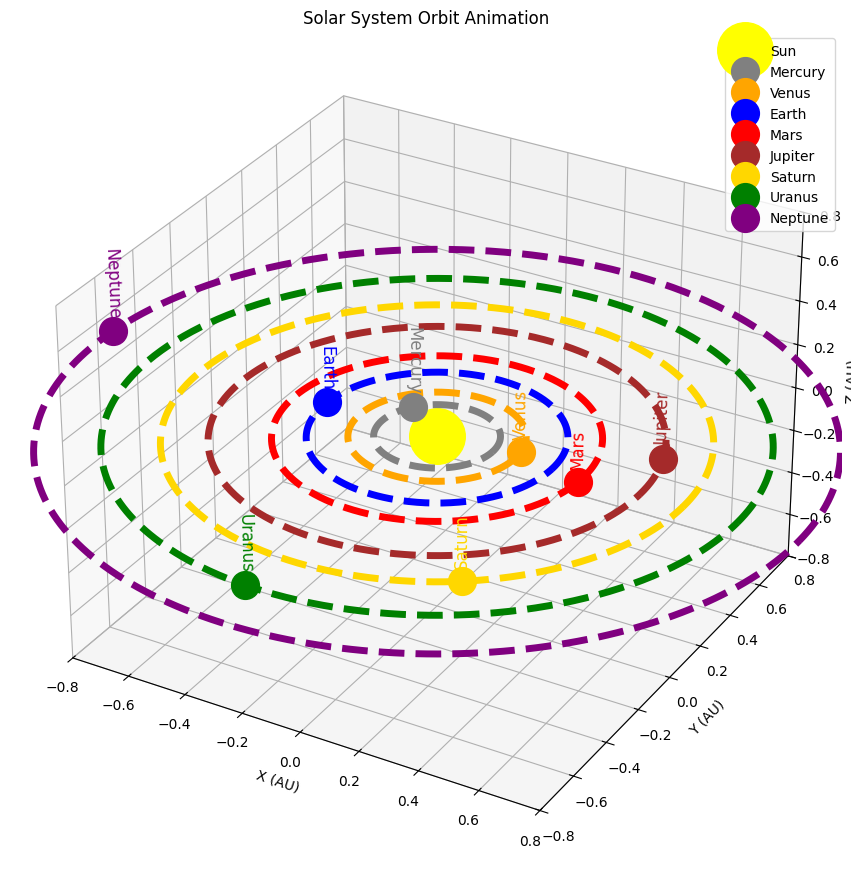

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Nonlinear orbit compression
scale = 0.3
def compress_orbit(a):
    return (a ** 0.5) * scale

# Planet orbital data
planets = {
    "Mercury": {"a": compress_orbit(0.40), "T": 0.24, "color": "gray"},
    "Venus":   {"a": compress_orbit(0.79), "T": 0.62, "color": "orange"},
    "Earth":   {"a": compress_orbit(1.7),  "T": 1.00, "color": "blue"},
    "Mars":    {"a": compress_orbit(2.72), "T": 1.88, "color": "red"},
    "Jupiter": {"a": compress_orbit(5.20), "T": 11.86,"color": "brown"},
    "Saturn":  {"a": compress_orbit(7.58), "T": 29.46,"color": "gold"},
    "Uranus":  {"a": compress_orbit(11.18),"T": 84.01,"color": "green"},
    "Neptune": {"a": compress_orbit(16.07),"T": 164.8,"color": "purple"},
}

# Per-planet speed adjustment factors (you can tweak these individually)
planet_speed_factors = {
    "Mercury": .2,
    "Venus":   .2,
    "Earth":   .2,
    "Mars":    0.3,
    "Jupiter": 1,
    "Saturn":  2,
    "Uranus":  5,
    "Neptune": 6.5
}

# Animation settings
speed = 40
frames = 500  # increased for longer video
interval = 100

# Set up figure
fig = plt.figure(figsize=(19.2, 10.8))
ax = fig.add_subplot(111, projection='3d')


ax.set_xlim([-.8, .8])
ax.set_ylim([-.8, .8])
ax.set_zlim([-.8, .8])

ax.set_title('Solar System Orbit Animation')
ax.set_xlabel('X (AU)')
ax.set_ylabel('Y (AU)')
ax.set_zlabel('Z (AU)')

# Plot the Sun
ax.plot([0], [0], [0], marker='o', markersize=40, color='yellow', label='Sun')

# Plot orbit paths (thicker and smoother)
for name, p in planets.items():
    a = p["a"]
    theta = np.linspace(0, 2 * np.pi, 500)
    x = a * np.cos(theta)
    y = a * np.sin(theta)
    z = np.zeros_like(theta)
    ax.plot(x, y, z, '--', linewidth=5, color=p["color"], alpha=1)

# Planet markers and text labels
planet_plots = {}
planet_labels = {}
for name, p in planets.items():
    planet_plots[name], = ax.plot([], [], [], 'o', color=p['color'], label=name, markersize=20)
    planet_labels[name] = ax.text(0, 0, 0, name, fontsize=12, color=p['color'], ha='center', va='bottom')

# Update function
def update(frame):
    t = frame / speed
    for name, p in planets.items():
        a = p['a']
        T = p['T']
        factor = planet_speed_factors.get(name, 1.0)
        local_t = t * factor
        theta = 2 * np.pi * local_t / T
        x = a * np.cos(theta)
        y = a * np.sin(theta)
        z = 0

        planet_plots[name].set_data([x], [y])
        planet_plots[name].set_3d_properties([z])

        planet_labels[name].set_position((x, y))
        planet_labels[name].set_3d_properties(z + 0.06)  # slightly above the planet
    return list(planet_plots.values()) + list(planet_labels.values())

# Create animation
ani = FuncAnimation(fig, update, frames=frames, interval=interval, blit=False)

# Save animation
writer = FFMpegWriter(fps=30, bitrate=1800)
ani.save("solar_system_clean_orbits.mp4", writer=writer, dpi=100)

# Show plot
plt.legend()
plt.show()
